Andrew Burke - Final Project EDA and Model

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, cross_validation
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'Datasets', 'BR_data.csv'))
df = df.set_index('user_identities.identity')
df

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
user_identities.identity,,,,,
4.32E+17,1,1,1,0,0
2.39E+18,1,5,1,0,0
5.27E+18,2,5,1,0,0
0000000000000a419698266553970235,3,3,1,0,0
000000000000a6409315927365159953,1,8,1,0,0
...,...,...,...,...,...
ffeeaa76195841efab257d819dac7bbb,2,27,12,1,0
fff0a4ec1e7548b2a8b3245defbeabc1,15,51,9,1,0
fff16bbe71f74b06a2e0b58186be2db9,1,5,2,0,0


In [3]:
df.mean()

articles_viewed             6.213623
streams_added              65.120716
sessions                   12.847026
greater_than_5_sessions     0.637812
push_enabled                0.092597
dtype: float64

Mean for streams added seams huge, there has to be outliers

In [4]:
df.var()

articles_viewed              101.157125
streams_added              38743.193372
sessions                     225.481994
greater_than_5_sessions        0.231017
push_enabled                   0.084026
dtype: float64

In [5]:
df.isnull().sum()

articles_viewed            0
streams_added              0
sessions                   0
greater_than_5_sessions    0
push_enabled               0
dtype: int64

In [6]:
df.articles_viewed.value_counts()

# I screwed up my order of operations here... I originally ran this before removing outliers and accidentally ran again after removing outliers...

1      6449
2      4204
3      2956
4      2174
5      1714
       ... 
134       1
78        1
94        1
274       1
106       1
Name: articles_viewed, dtype: int64

In [7]:
df.streams_added.value_counts()

5       1247
1       1142
4        973
6        855
7        809
        ... 
584        1
632        1
648        1
728        1
2049       1
Name: streams_added, dtype: int64

In [8]:
df.sessions.value_counts()

2      2111
3      2092
4      1963
5      1724
6      1604
       ... 
213       1
139       1
155       1
177       1
159       1
Name: sessions, dtype: int64

In [9]:
df.push_enabled.value_counts()

0    23460
1     2394
Name: push_enabled, dtype: int64

In [10]:
df.greater_than_5_sessions.value_counts()

1    16490
0     9364
Name: greater_than_5_sessions, dtype: int64

In [11]:
df.describe()

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
count,25854.000000,25854.000000,25854.000000,25854.000000,25854.000000
mean,6.213623,65.120716,12.847026,0.637812,0.092597
std,10.057690,196.832907,15.016058,0.480642,0.289872
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,8.000000,4.000000,0.000000,0.000000
50%,3.000000,21.000000,8.000000,1.000000,0.000000
75%,7.000000,58.000000,16.000000,1.000000,0.000000
max,481.000000,9953.000000,288.000000,1.000000,1.000000


In [12]:
df.corr()

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
articles_viewed,1.000000,0.202627,0.582199,0.277830,-0.038056
streams_added,0.202627,1.000000,0.415350,0.188577,-0.024599
sessions,0.582199,0.415350,1.000000,0.492285,-0.018064
greater_than_5_sessions,0.277830,0.188577,0.492285,1.000000,-0.001644
push_enabled,-0.038056,-0.024599,-0.018064,-0.001644,1.000000


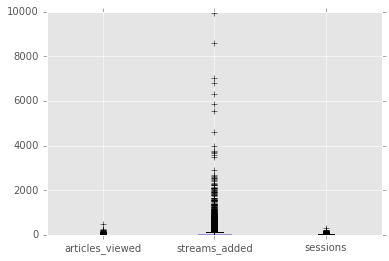

In [13]:
df[['articles_viewed', 'streams_added', 'sessions']].plot(kind = 'box')

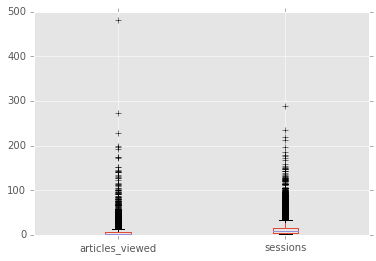

In [14]:
df[['articles_viewed', 'sessions']].plot(kind = 'box')

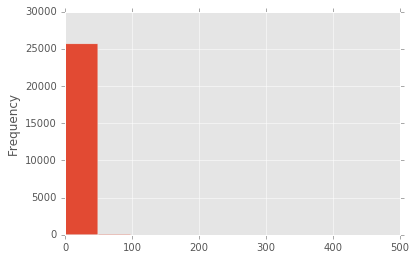

In [15]:
df.articles_viewed.plot(kind = 'hist')

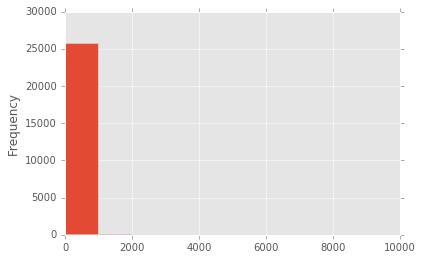

In [16]:
df.streams_added.plot(kind = 'hist')

In [17]:
color = df.greater_than_5_sessions.map({ 1 : 'red', 0 : 'green'})

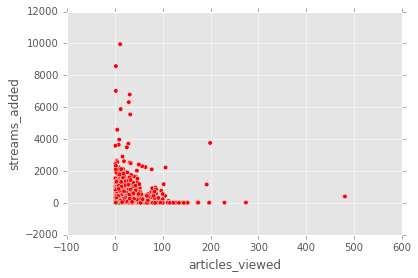

In [18]:
df.plot(x = 'articles_viewed', y = 'streams_added', kind = 'scatter', c = color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118df6ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c6bc0d0>]], dtype=object)

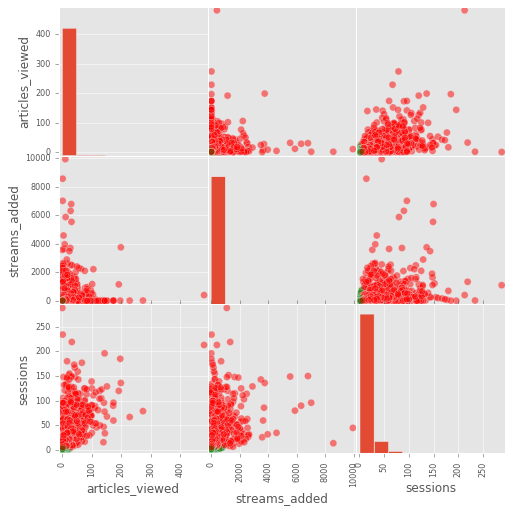

In [19]:
pd.tools.plotting.scatter_matrix(df[ ['articles_viewed', 'streams_added', 'sessions'] ], s = 200, figsize = (8, 8), c = color)

In [20]:
pd.crosstab(df.articles_viewed, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
articles_viewed,,
1,4035,2414
2,2214,1990
3,1185,1771
4,705,1469
5,455,1259
...,...,...
197,0,1
199,0,1
229,0,1


In [21]:
pd.crosstab(df.push_enabled, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
push_enabled,,
0,8491,14969
1,873,1521


In [22]:
pd.crosstab(df.streams_added, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
streams_added,,
1,913,229
2,543,191
3,488,207
4,623,350
5,776,471
...,...,...
6320,0,1
6796,0,1
7025,0,1


Removing Outliers

In [23]:
Q1_sa = df.streams_added.quantile(0.25)
Q3_sa = df.streams_added.quantile(0.75)

IQR_sa = Q3_sa - Q1_sa

IQR_sa

50.0

In [24]:
df.drop(df[df.streams_added > Q3_sa + 1.5 * IQR_sa].index, inplace = True)
df.shape[0]

23025

In [25]:
Q1_av = df.articles_viewed.quantile(0.25)
Q3_av = df.articles_viewed.quantile(0.75)

IQR_av = Q3_av - Q1_av

IQR_av

5.0

In [26]:
df.drop(df[df.articles_viewed > Q3_av + 1.5 * IQR_av].index, inplace = True)
df.shape[0]

21242

In [27]:
Q1_s = df.sessions.quantile(0.25)
Q3_s = df.sessions.quantile(0.75)

IQR_s = Q3_s - Q1_s

IQR_s

9.0

In [28]:
df.drop(df[df.sessions > Q3_s + 1.5 * IQR_s].index, inplace = True)
df.shape[0]

20278

Re-doing EDA without Outliers

In [29]:
df.describe()

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
count,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000
mean,3.520712,25.733554,7.625801,0.544235,0.098974
std,2.857370,27.699564,5.633374,0.498052,0.298635
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,6.000000,3.000000,0.000000,0.000000
50%,3.000000,15.000000,6.000000,1.000000,0.000000
75%,5.000000,36.000000,11.000000,1.000000,0.000000
max,13.000000,133.000000,25.000000,1.000000,1.000000


In [30]:
df.corr()

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
articles_viewed,1.000000,0.203452,0.419417,0.348046,-0.027919
streams_added,0.203452,1.000000,0.468113,0.388076,-0.036327
sessions,0.419417,0.468113,1.000000,0.747506,0.009645
greater_than_5_sessions,0.348046,0.388076,0.747506,1.000000,0.015160
push_enabled,-0.027919,-0.036327,0.009645,0.015160,1.000000


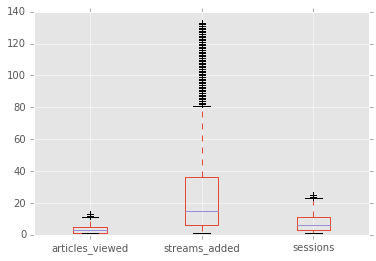

In [31]:
df[['articles_viewed', 'streams_added', 'sessions']].plot(kind = 'box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11da1fa10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ea8c4d0>]], dtype=object)

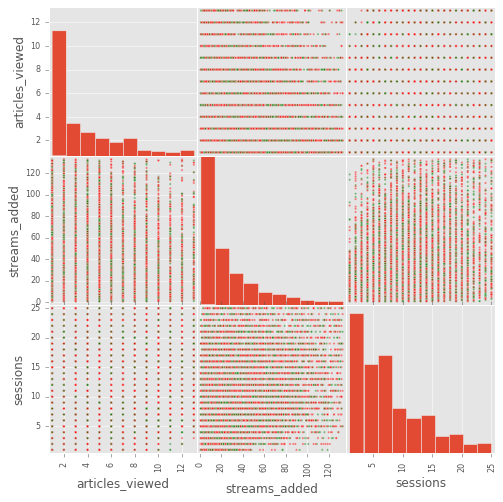

In [32]:
pd.tools.plotting.scatter_matrix(df[ ['articles_viewed', 'streams_added', 'sessions'] ], figsize = (8, 8), c = color)

In [33]:
df.sessions.value_counts()

2     2099
3     2067
4     1936
5     1667
6     1538
      ... 
20     208
22     161
23     147
25     136
24     127
Name: sessions, dtype: int64

In [34]:
df.streams_added.value_counts()

5      1157
1      1129
4       905
6       801
7       736
       ... 
103      12
112      11
123      10
118      10
133      10
Name: streams_added, dtype: int64

In [35]:
pd.crosstab(df.articles_viewed, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
articles_viewed,,
1,4001,2147
2,2197,1736
3,1177,1499
4,698,1214
5,451,1019
...,...,...
9,75,434
10,41,348
11,31,266


In [36]:
pd.crosstab(df.streams_added, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
streams_added,,
1,911,218
2,542,179
3,486,184
4,618,287
5,772,385
...,...,...
129,2,20
130,0,14
131,1,15


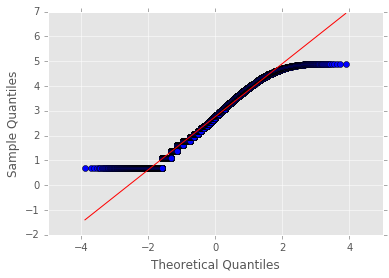

In [44]:
sm.qqplot(df.streams_added.apply(lambda x: np.log(1 + x)), line = 's')
#sm.qqplot(df.streams_added, line = 's')


pass

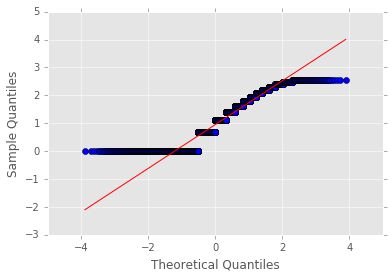

In [47]:
sm.qqplot(df.articles_viewed.apply(lambda x: np.log(1 + x)), line = 's')

pass

In [58]:
articles_per_stream = df.articles_viewed / df.streams_added
articles_per_stream

user_identities.identity
4.32E+17                            1.000000
2.39E+18                            0.200000
5.27E+18                            0.400000
0000000000000a419698266553970235    1.000000
000000000000a6409315927365159953    0.125000
                                      ...   
ffebf65d7954494cabf9c7d932f5c916    0.500000
ffeeaa76195841efab257d819dac7bbb    0.074074
fff16bbe71f74b06a2e0b58186be2db9    0.200000
fff8033f52ac4d67ae61f2e70559e681    0.666667
fffc6535ff9441ee81e321e95374ed77    0.071429
dtype: float64

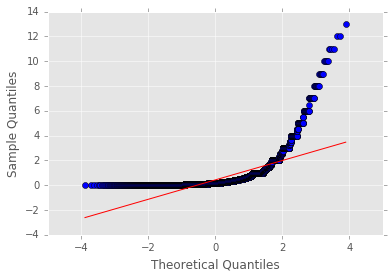

In [59]:
sm.qqplot(articles_per_stream, line = 's')

pass

Training the logistic regression model - trying to predict if a user will have > 5 sessions or not. (although I'm not very confident I will find anything based on the EDA above)

In [73]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

In [74]:
names_X = ['articles_viewed', 'streams_added', 'push_enabled']

def X_c(df):
    X = df[ names_X ]
    c = df.greater_than_5_sessions
    return X, c

train_X, train_c = X_c(train_df)
test_X, test_c = X_c(test_df)